<a href="https://colab.research.google.com/github/swethasenthil30/1b/blob/main/Sentiment_analysis_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.5368 - loss: 0.6864 - val_accuracy: 0.7854 - val_loss: 0.4759
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.8006 - loss: 0.4479 - val_accuracy: 0.7550 - val_loss: 0.5717
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.8887 - loss: 0.2852 - val_accuracy: 0.8488 - val_loss: 0.3690
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9522 - loss: 0.1475 - val_accuracy: 0.8440 - val_loss: 0.4269
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9775 - loss: 0.0817 - val_accuracy: 0.8206 - val_loss: 0.4826
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.6528 - loss: 0.6093 - val_accuracy: 0.8520 - val_loss: 0.3702
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.8829 - loss: 0.2974 - val_accuracy: 0.8658 - val_loss: 0.3184
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9233 - loss: 0.2060 - val_accuracy: 0

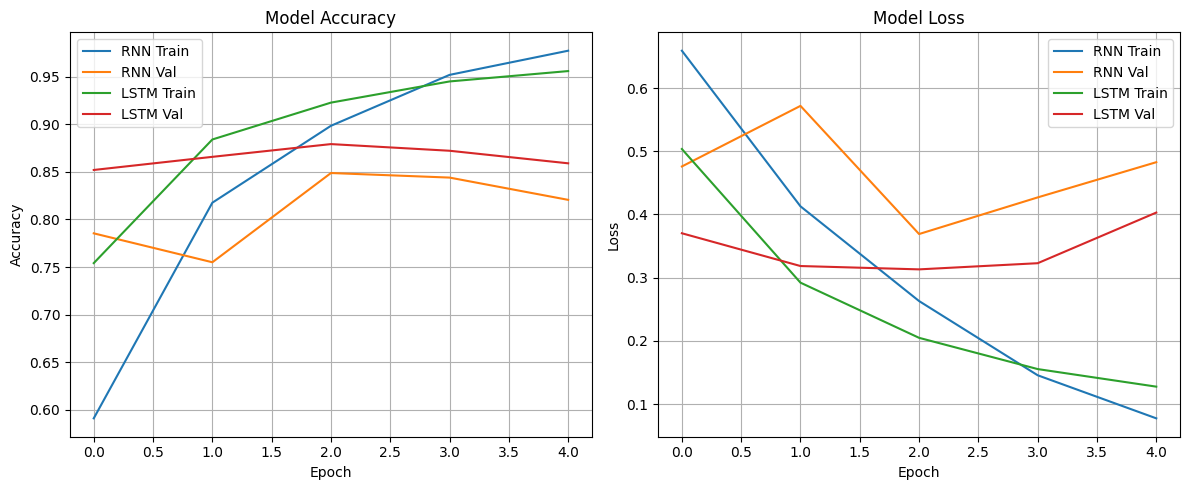

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense

# Load IMDB dataset
max_features = 10000   # number of words to consider as features
maxlen = 200           # cut/pad reviews to this length

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)  # builtin dataset :contentReference[oaicite:1]{index=1}

x_train = pad_sequences(x_train, maxlen=maxlen)  # pad/truncate sequences :contentReference[oaicite:2]{index=2}
x_test = pad_sequences(x_test, maxlen=maxlen)

# --- Model 1: Simple RNN ---
rnn_model = Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# --- Model 2: LSTM ---
lstm_model = Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# --- Plot results ---
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(rnn_history.history['accuracy'], label='RNN Train')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val')
plt.plot(lstm_history.history['accuracy'], label='LSTM Train')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(rnn_history.history['loss'], label='RNN Train')
plt.plot(rnn_history.history['val_loss'], label='RNN Val')
plt.plot(lstm_history.history['loss'], label='LSTM Train')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
